In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.preprocessing import StandardScaler 

In [2]:
torch_ba = pd.read_csv('pred_test_ba.csv')
gbm_ba = pd.read_csv('gbm_ba.csv')
torch_ba.drop('Unnamed: 0', axis = 1, inplace = True)
label = pd.read_csv('test_label.csv').target.map({"Class_1":0, "Class_2":1, "Class_3":2, "Class_4":3})
label = np.array(label)
torch_ba = np.array(torch_ba)
gbm_ba = np.array(gbm_ba)


In [3]:
torch_pred = np.array([np.argwhere(x == x.max())for x in torch_ba]).squeeze()
gbm_pred = np.array([np.argwhere(x == x.max())for x in gbm_ba]).squeeze()
# scaler = StandardScaler()
# torch_ba = scaler.fit_transform(torch_ba)
# gbm_ba = scaler.fit_transform(gbm_ba)
merge_ba = (torch_ba+gbm_ba)/2
merge_pred = np.array([np.argwhere(x == x.max())for x in merge_ba]).squeeze()

In [5]:
sp  = pd.read_csv('sample_submission.csv')
sp

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25
1,100001,0.25,0.25,0.25,0.25
2,100002,0.25,0.25,0.25,0.25
3,100003,0.25,0.25,0.25,0.25
4,100004,0.25,0.25,0.25,0.25
...,...,...,...,...,...
49995,149995,0.25,0.25,0.25,0.25
49996,149996,0.25,0.25,0.25,0.25
49997,149997,0.25,0.25,0.25,0.25
49998,149998,0.25,0.25,0.25,0.25


In [6]:
torch_ba.size


80000

In [39]:
gbm_ba

array([[0.02573478, 0.52341225, 0.41291213, 0.03794084],
       [0.06403118, 0.49454252, 0.34417159, 0.0972547 ],
       [0.11374126, 0.65501724, 0.14029585, 0.09094565],
       ...,
       [0.16115675, 0.48374561, 0.10624133, 0.24885631],
       [0.05270594, 0.711948  , 0.14647419, 0.08887187],
       [0.10529847, 0.44676158, 0.34796956, 0.09997039]])

In [40]:
print('torch预测accuracy：',np.array([label == torch_pred]).sum()/len(label))
print('gbm预测accuracy：',np.array([label == gbm_pred]).sum()/len(label))
print('merge预测accuracy：',np.array([label == merge_pred]).sum()/len(label))

torch预测accuracy： 0.57345
gbm预测accuracy： 0.5708
merge预测accuracy： 0.57795


In [41]:
criteria = torch.nn.CrossEntropyLoss()
torch_loss = criteria(torch.from_numpy(torch_ba), torch.from_numpy(label))
gbm_loss = criteria(torch.from_numpy(gbm_ba), torch.from_numpy(label))
merge_loss = criteria(torch.from_numpy(merge_ba), torch.from_numpy(label))
print('torch预测loss：',torch_loss)
print('gbm预测loss：',gbm_loss)
print('merge预测loss：',merge_loss)

torch预测loss： tensor(1.1311, dtype=torch.float64)
gbm预测loss： tensor(1.2256, dtype=torch.float64)
merge预测loss： tensor(1.1660, dtype=torch.float64)


<AxesSubplot:ylabel='Count'>

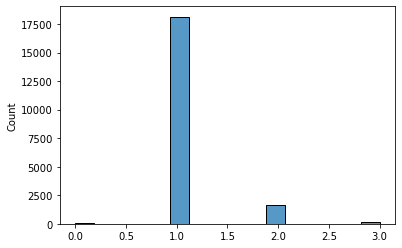

In [42]:
sns.histplot(gbm_pred)

<AxesSubplot:ylabel='Count'>

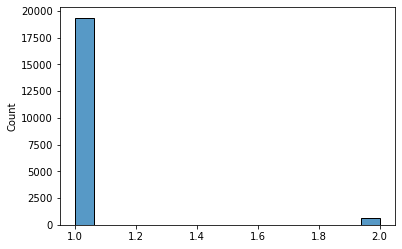

In [43]:
sns.histplot(torch_pred)

<AxesSubplot:ylabel='Count'>

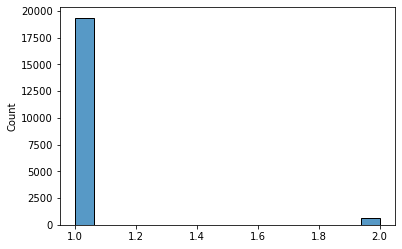

In [44]:
sns.histplot(merge_pred)

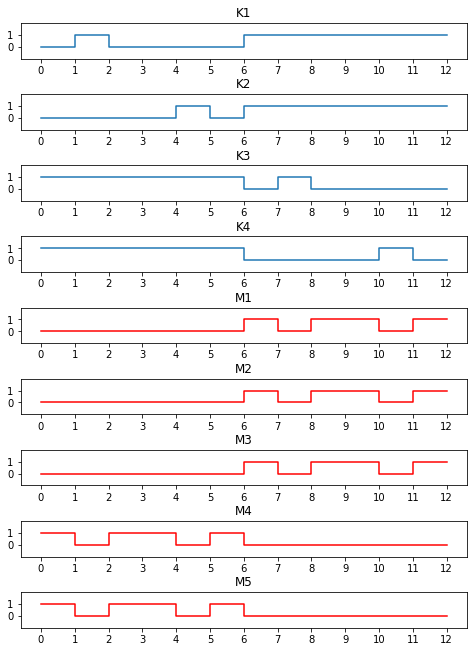

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = [8,16])
plt.subplot(9,1,1)
plt.step(range(13),[0,0,1,0,0,0,0,1,1,1,1,1,1])
plt.ylim(-1,2)
plt.xticks(range(13))
plt.yticks([0,1])
plt.title('K1')

plt.subplot(9,1,2)
plt.step(range(13),[0,0,0,0,0,1,0,1,1,1,1,1,1])
plt.ylim(-1,2)
plt.xticks(range(13))
plt.yticks([0,1])
plt.title('K2')

plt.subplot(9,1,3)
plt.step(range(13),[1,1,1,1,1,1,1,0,1,0,0,0,0])
plt.ylim(-1,2)
plt.xticks(range(13))
plt.yticks([0,1])
plt.title('K3')

plt.subplot(9,1,4)
plt.step(range(13),[1,1,1,1,1,1,1,0,0,0,0,1,0])
plt.ylim(-1,2)
plt.xticks(range(13))
plt.yticks([0,1])
plt.title('K4')


plt.subplot(9,1,5)
plt.step(range(13),[0,0,0,0,0,0,0,1,0,1,1,0,1],'r')
plt.ylim(-1,2)
plt.xticks(range(13))
plt.yticks([0,1])
plt.title('M1')

plt.subplot(9,1,6)
plt.step(range(13),[0,0,0,0,0,0,0,1,0,1,1,0,1],'r')
plt.ylim(-1,2)
plt.xticks(range(13))
plt.yticks([0,1])
plt.title('M2')

plt.subplot(9,1,7)
plt.step(range(13),[0,0,0,0,0,0,0,1,0,1,1,0,1],'r')
plt.ylim(-1,2)
plt.xticks(range(13))
plt.yticks([0,1])
plt.title('M3')

plt.subplot(9,1,8)
plt.step(range(13),[1,1,0,1,1,0,1,0,0,0,0,0,0],'r')
plt.ylim(-1,2)
plt.xticks(range(13))
plt.yticks([0,1])
plt.title('M4')

plt.subplot(9,1,9)
plt.step(range(13),[1,1,0,1,1,0,1,0,0,0,0,0,0],'r')
plt.ylim(-1,2)
plt.xticks(range(13))
plt.yticks([0,1])
plt.title('M5')



plt.subplots_adjust(left=None, bottom=None, right=None, top=0.65,
                wspace=0, hspace=1)

plt.savefig('ddd.jpg')

In [4]:
for i in range(3):
    if i==2:
        break


In [5]:
i

2